In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import gmaps
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.ticker import FuncFormatter
import datetime
import requests
import json
from scipy import stats
from scipy.stats import linregress

In [2]:
world_df= pd.read_csv("../Resources/owid-covid-data.csv")


updated_world_df=world_df.drop(["iso_code", "new_deaths_per_million","total_tests","new_tests",
                                "new_tests_smoothed_per_thousand","population","median_age","aged_70_older",
                                "extreme_poverty","female_smokers","male_smokers",
                               "handwashing_facilities","hospital_beds_per_thousand","life_expectancy",
                               "new_tests_smoothed","new_tests_per_thousand","tests_units","total_deaths",
                               "new_deaths","total_cases_per_million","new_cases_per_million"], axis=1)

updated_world_df=updated_world_df.rename(columns={"location":"Country", "continent":"Continent","date":"Date",
                                                  "total_deaths_per_million":"Total Deaths Per Million","total_cases":"Total Cases", "new_cases":"New Cases",
                                                  "total_tests_per_thousand":"Total Test Per Thousands","diabetes_prevalence":"Diabetes Prevalence",
                                                 "population_density":"Population Density","aged_65_older":"Aged 65 or older",
                                                 "gdp_per_capita":"GDP Per Capita","cvd_death_rate":"Covid Death Rate",
                                                 "stringency_index":"Stringency Index"})

#updated_world_df.fillna(0, inplace=True)
updated_world_df=updated_world_df[updated_world_df["Date"]!= "2020-06-22" ]

updated_world_df.head()

,Continent,Country,Date,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Diabetes Prevalence
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,NaN,NaN,54.422,2.581,1803.987,597.029,9.59
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59


In [3]:
#Number Hospital Beds is based on the lastest year per Country

data = pd.read_csv("../Resources/data.csv")

who_df = data.iloc[data.groupby("Country")["Year"].agg(pd.Series.idxmax)]
who_df.reset_index(drop=True).set_index("Country")
who_df=who_df.rename(columns={"Hospital beds (per 10 000 population)":"Hospital Beds (per 10K people)"})
hospital_beds_df=who_df.drop(["Year"], axis=1)

hospital_beds_df.head()

,Country,Hospital Beds (per 10K people)
0,Afghanistan,5
16,Albania,29
29,Algeria,19
31,Angola,8
32,Antigua and Barbuda,38


In [4]:
#Smoking Percentage is based on the lastest year per Country

smokingdata = pd.read_csv("../Resources/smokingdata.csv")

smokingdata_df = smokingdata.iloc[smokingdata.groupby("Country")["Year"].agg(pd.Series.idxmax)]

clean_smoking_data = smokingdata_df.drop(["Estimate of current cigarette smoking prevalence (%).1", "Estimate of current cigarette smoking prevalence (%).2", 
                                       "Estimate of current tobacco smoking prevalence (%)", "Estimate of current tobacco smoking prevalence (%).1", 
                                       "Estimate of current tobacco smoking prevalence (%).2", "Estimate of current tobacco use prevalence (%)", 
                                       "Estimate of current tobacco use prevalence (%).1", "Estimate of current tobacco use prevalence (%).2"], axis=1)

 
clean_smoking_data=clean_smoking_data.rename(columns={"Estimate of current cigarette smoking prevalence (%)":"Smoking Prevalence (%)"})
smoking_data = clean_smoking_data
smoking_prevalence=list(smoking_data["Smoking Prevalence (%)"])
smoking_percentage=[]

for x in smoking_prevalence:
    y=x.split("[")
    smoking_percentage.append(y[0])
    

    
column_values = pd.Series(smoking_percentage)
smoking_data.insert(loc=2, column="Smoking Percetage", value=column_values)
smoking_year_df=smoking_data.drop(["Smoking Prevalence (%)"], axis=1)

smoking_df=smoking_year_df.drop(["Year"], axis=1)

smoking_df.head()

,Country,Smoking Percetage
1,Albania,11.20
7,Algeria,15.20
13,Andorra,21.40
19,Argentina,31.40
25,Armenia,6.00


In [5]:
world_df=pd.read_csv("../Resources/dsh_simple.csv")

world_df=world_df[["Countryname","IfclosedduetoCOVID19whend","Statusof Schoolsaresomeall (copy) (group)",
          "Latitude (generated)","Longitude (generated)","Incomelevelname"]]

income_level_df=world_df.rename(columns={"Countryname":"Country", "Latitude (generated)":"Latitude", 
                      "Longitude (generated)": "Longitude", "Incomelevelname": "Income Level",
                        "Statusof Schoolsaresomeall (copy) (group)":"School Status"})
income_df=income_level_df.drop(["IfclosedduetoCOVID19whend"], axis =1)

income_df.head()

,Country,School Status,Latitude,Longitude,Income Level
0,Eritrea,Closed,15.9820,38.0200,Low income
1,Guinea-Bissau,Closed,12.1910,-14.4750,Low income
2,San Marino,Closed,43.9420,12.4611,High income
3,Georgia,Closed,42.0500,43.5760,Upper middle income
4,Italy,Closed,44.3713,11.1084,High income


In [6]:
combined_df=pd.merge(updated_world_df,hospital_beds_df,on="Country",how="left").merge(smoking_df,on="Country",how="left" ).merge(income_df,on="Country",how="left")

combined_df.head()

,Continent,Country,Date,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Diabetes Prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,NaN,NaN,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income


In [7]:
world_data = combined_df[combined_df['Country']=='World']
world_data.head()

,Continent,Country,Date,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Diabetes Prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
25050,NaN,World,2019-12-31,27.0,27.0,0.0,NaN,NaN,58.045,8.696,15469.207,233.07,8.51,NaN,NaN,NaN,NaN,NaN,NaN
25051,NaN,World,2020-01-01,27.0,0.0,0.0,NaN,NaN,58.045,8.696,15469.207,233.07,8.51,NaN,NaN,NaN,NaN,NaN,NaN
25052,NaN,World,2020-01-02,27.0,0.0,0.0,NaN,NaN,58.045,8.696,15469.207,233.07,8.51,NaN,NaN,NaN,NaN,NaN,NaN
25053,NaN,World,2020-01-03,44.0,17.0,0.0,NaN,NaN,58.045,8.696,15469.207,233.07,8.51,NaN,NaN,NaN,NaN,NaN,NaN
25054,NaN,World,2020-01-04,44.0,0.0,0.0,NaN,NaN,58.045,8.696,15469.207,233.07,8.51,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
combined_df[(combined_df['Continent']=='South America')].groupby("Date").sum()

,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Diabetes Prevalence,Hospital Beds (per 10K people),Latitude,Longitude
Date,,,,,,,,,,,,,
2019-12-31,0.0,0.0,0.000,0.000,0.00,91.979,15.656,24685.388,318.409,13.66,37.0,-12.845,-127.286
2020-01-01,0.0,0.0,0.000,0.000,0.00,91.979,15.656,24685.388,318.409,13.66,37.0,-12.845,-127.286
2020-01-02,0.0,0.0,0.000,0.000,0.00,91.979,15.656,24685.388,318.409,13.66,37.0,-12.845,-127.286
2020-01-03,0.0,0.0,0.000,0.000,0.00,91.979,15.656,24685.388,318.409,13.66,37.0,-12.845,-127.286
2020-01-04,0.0,0.0,0.000,0.000,0.00,91.979,15.656,24685.388,318.409,13.66,37.0,-12.845,-127.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17,1507419.0,48890.0,975.271,101.050,340.27,292.704,99.327,166089.423,2247.887,93.73,228.0,-141.563,-702.011
2020-06-18,1581275.0,77006.0,1004.346,74.271,253.23,256.451,92.713,149344.401,2043.037,87.26,228.0,-141.563,-702.011
2020-06-19,1620122.0,35697.0,1038.989,70.865,167.12,292.704,99.327,166089.423,2247.887,93.73,228.0,-141.563,-702.011


In [9]:
africa_cases = combined_df[(combined_df['Continent']=='Africa')].groupby("Date")
africa_cases_daily = africa_cases.sum()
africa_cases_list= africa_cases_daily['Total Cases'].values.tolist()

asia_cases = combined_df[(combined_df['Continent']=='Asia')].groupby("Date")
asia_cases_daily = asia_cases.sum()
asia_cases_list= asia_cases_daily['Total Cases'].values.tolist()

europe_cases = combined_df[(combined_df['Continent']=='Europe')].groupby("Date")
europe_cases_daily = europe_cases.sum()
europe_cases_list= europe_cases_daily['Total Cases'].values.tolist()

north_america_cases = combined_df[(combined_df['Continent']=='North America')].groupby("Date")
north_america_cases_daily = north_america_cases.sum()
north_america_cases_list= north_america_cases_daily['Total Cases'].values.tolist()

oceania_cases = combined_df[(combined_df['Continent']=='Oceania')].groupby("Date")
oceania_cases_daily = oceania_cases.sum()
oceania_cases_list= oceania_cases_daily['Total Cases'].values.tolist()

south_america_cases = combined_df[(combined_df['Continent']=='South America')].groupby("Date")
south_america_cases_daily = south_america_cases.sum()
south_america_cases_list= south_america_cases_daily['Total Cases'].values.tolist()


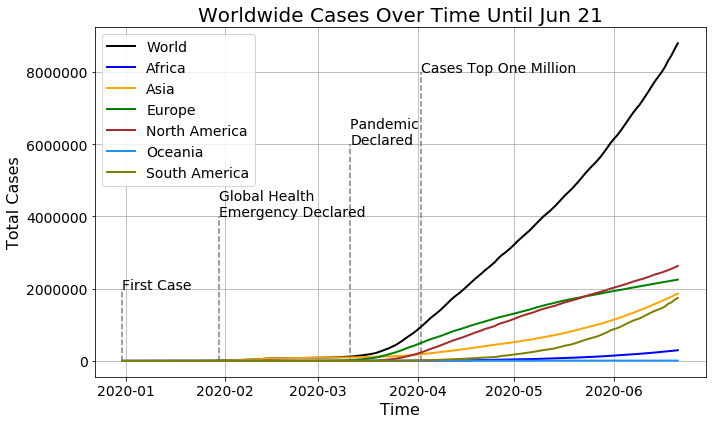

In [92]:


dates = world_data['Date'].values.tolist()
world_cases=world_data['Total Cases'].values.tolist()
dates_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]



plt.figure(figsize=(10,6))

world_handle, = plt.plot(dates_values, world_cases,color="black",label="World",linewidth=2)
africa_handle, = plt.plot(dates_values, africa_cases_list,color="blue",label="Africa",linewidth=2)
asia_handle, = plt.plot(dates_values, asia_cases_list,color="orange",label="Asia",linewidth=2)
europe_handle, = plt.plot(dates_values, europe_cases_list,color="green",label="Europe",linewidth=2)
north_america_handle, = plt.plot(dates_values, north_america_cases_list,color="brown",label="North America",linewidth=2)
oceania_handle, = plt.plot(dates_values, oceania_cases_list,color="dodgerblue",label="Oceania",linewidth=2)
south_america_handle, = plt.plot(dates_values, south_america_cases_list,color="olive",label="South America",linewidth=2)

# plt.xticks(rotation='40')
plt.legend(loc="upper left", fontsize=14)
plt.title("Worldwide Cases Over Time Until Jun 21", fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Time",fontsize=16)
plt.ylabel("Total Cases", fontsize=16)

# Plot horiontal lines
dates_important=["2019-12-31", "2020-01-30", "2020-03-11", "2020-04-02"]
dates_important_values=[datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates_important]

plt.vlines(dates_important_values[0], 0, 2000000, colors='grey', linestyles='dashed', label='line1') #who declares covid a pandemic 
plt.vlines(dates_important_values[1], 0, 4000000, colors='grey', linestyles='dashed', label='line1') #first US case confirmed
plt.vlines(dates_important_values[2], 0, 6000000, colors='grey', linestyles='dashed', label='line1')
plt.vlines(dates_important_values[3], 0, 8000000, colors='grey', linestyles='dashed', label='line1')

plt.text(dates_important_values[0], 2000000,"First Case", size=14)
plt.text(dates_important_values[1], 4000000,"Global Health \nEmergency Declared", size=14)
plt.text(dates_important_values[2], 6000000,"Pandemic \nDeclared", size=14)
plt.text(dates_important_values[3], 8000000,"Cases Top One Million", size=14)
# plt.xlabel("Time")
# plt.ylabel("Cases")
plt.tight_layout()

plt.grid()
plt.savefig('Worldwide Cases1.png', dpi=400)
plt.show()


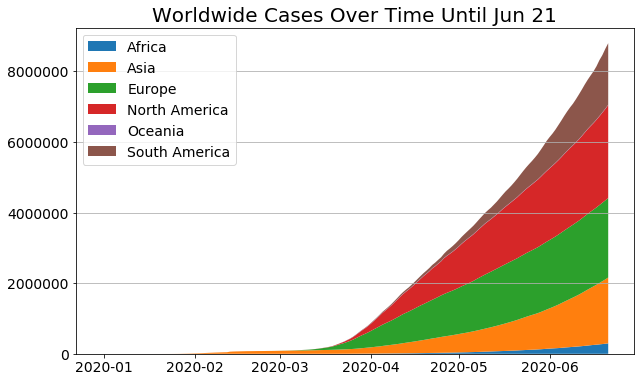

In [91]:
dates = world_data['Date'].values.tolist()
world_cases=world_data['Total Cases'].values.tolist()
dates_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
x=dates_values



y=np.vstack([africa_cases_list, asia_cases_list, europe_cases_list, 
             north_america_cases_list,oceania_cases_list, south_america_cases_list])
labels=["Africa","Asia","Europe","North America","Oceania","South America"]

fig, ax = plt.subplots(figsize=(10,6))

ax.stackplot(x, y, labels=labels)
ax.legend(loc='upper left', fontsize=14)
ax.set_title("Worldwide Cases Over Time Until Jun 21", fontsize=20)
ax.yaxis.grid()
fig.savefig('Worldwide Cases2.png', dpi=400)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


In [12]:
countries_data = combined_df[(combined_df['Date']=='2020-06-21') & (combined_df['Country']!='World')]
# countries_cases_0622=
countries_list = countries_data['Country'].values.tolist()
# countries_list
countries_data.head()

,Continent,Country,Date,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Diabetes Prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
163,Asia,Afghanistan,2020-06-21,28424.0,546.0,14.617,NaN,NaN,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.0230,65.5267,Low income
268,Europe,Albania,2020-06-21,1891.0,53.0,14.942,NaN,NaN,104.871,13.188,11803.431,304.195,10.08,29.0,11.20,Open with limitations,40.6540,20.0760,Upper middle income
437,Africa,Algeria,2020-06-21,11631.0,127.0,19.087,NaN,NaN,17.348,6.211,13913.839,278.364,6.73,19.0,15.20,Closed,28.6045,2.6400,Upper middle income
537,Europe,Andorra,2020-06-21,855.0,0.0,673.008,NaN,NaN,163.755,NaN,NaN,109.135,7.97,NaN,21.40,NaN,NaN,NaN,NaN
629,Africa,Angola,2020-06-21,172.0,6.0,0.243,NaN,NaN,23.890,2.405,5819.495,276.045,3.94,8.0,NaN,Closed,-12.8360,17.8080,Lower middle income


In [13]:
countries_data=countries_data.set_index('Country')
countries_data.head()

,Continent,Date,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Diabetes Prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
Country,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,2020-06-21,28424.0,546.0,14.617,NaN,NaN,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.0230,65.5267,Low income
Albania,Europe,2020-06-21,1891.0,53.0,14.942,NaN,NaN,104.871,13.188,11803.431,304.195,10.08,29.0,11.20,Open with limitations,40.6540,20.0760,Upper middle income
Algeria,Africa,2020-06-21,11631.0,127.0,19.087,NaN,NaN,17.348,6.211,13913.839,278.364,6.73,19.0,15.20,Closed,28.6045,2.6400,Upper middle income
Andorra,Europe,2020-06-21,855.0,0.0,673.008,NaN,NaN,163.755,NaN,NaN,109.135,7.97,NaN,21.40,NaN,NaN,NaN,NaN
Angola,Africa,2020-06-21,172.0,6.0,0.243,NaN,NaN,23.890,2.405,5819.495,276.045,3.94,8.0,NaN,Closed,-12.8360,17.8080,Lower middle income


from config import gkey
lat_list=[]
lng_list=[]
country_update=[]
country_case_list=[]

for country in countries_list:
    
    params = {"address": country, "key": gkey}
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    response = requests.get(base_url, params=params)
    country_geo = response.json()
    country_case = countries_data.loc[country, "Total Cases"]

    try:
        lat = country_geo["results"][0]["geometry"]["location"]["lat"]
        lng = country_geo["results"][0]["geometry"]["location"]["lng"]
        
        lat_list.append(lat)
        lng_list.append(lng)
        country_update.append(country)
        country_case_list.append(country_case)
        
        
    except:
        print("Country not found")
        pass

cases_map_df = pd.DataFrame({'Country':country_update,'Lat':lat_list, 'Lng':lng_list,"Case Number":country_case_list})
cases_map_df.head()

gmaps.configure(api_key=gkey)

locations = cases_map_df[["Lat", "Lng"]].astype(float)
cases = cases_map_df['Case Number'].astype(float)

fig = gmaps.Map()

heat_layer = gmaps.heatmap_layer(locations, weights=cases, 
                                 dissipating=False, max_intensity=100000,
                                 point_radius =4)

fig.add_layer(heat_layer)

fig

In [14]:
countries_data_number_index=countries_data.reset_index()
countries_data_number_index=countries_data_number_index.rename(columns={"Aged 65 or older":"% of Aged 65 or older"})
countries_data_number_index.head()

,Country,Continent,Date,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,% of Aged 65 or older,GDP Per Capita,Covid Death Rate,Diabetes Prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
0,Afghanistan,Asia,2020-06-21,28424.0,546.0,14.617,NaN,NaN,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.0230,65.5267,Low income
1,Albania,Europe,2020-06-21,1891.0,53.0,14.942,NaN,NaN,104.871,13.188,11803.431,304.195,10.08,29.0,11.20,Open with limitations,40.6540,20.0760,Upper middle income
2,Algeria,Africa,2020-06-21,11631.0,127.0,19.087,NaN,NaN,17.348,6.211,13913.839,278.364,6.73,19.0,15.20,Closed,28.6045,2.6400,Upper middle income
3,Andorra,Europe,2020-06-21,855.0,0.0,673.008,NaN,NaN,163.755,NaN,NaN,109.135,7.97,NaN,21.40,NaN,NaN,NaN,NaN
4,Angola,Africa,2020-06-21,172.0,6.0,0.243,NaN,NaN,23.890,2.405,5819.495,276.045,3.94,8.0,NaN,Closed,-12.8360,17.8080,Lower middle income


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = px.scatter(countries_data_number_index, x="% of Aged 65 or older",y="Total Deaths Per Million", color="Continent",
                hover_name="Country",trendline="ols",facet_col="Continent",size_max=45,range_x=[0,25],range_y=[0,700])

fig.update_layout(
  title='Seniors in Different Countries During the COVID-19',
  autosize=False, width = 1800, height=300
)
fig.update_yaxes(tick0=0, dtick=100)
fig.update_xaxes(tick0=0, dtick=5)

fig.show()

fig = px.scatter(countries_data_number_index, x="% of Aged 65 or older",y="Total Deaths Per Million", 
                hover_name="Country",size_max=45,range_x=[0,25],range_y=[-25,700],
                trendline="ols"
                )
fig.update_layout(
  title='Seniors in Different Countries During the COVID-19',
  xaxis_title_text='% of People Aged 65 or Older (By country)', yaxis_title_text='Total Deaths Per Million'
)


fig.show()
results = px.get_trendline_results(fig)

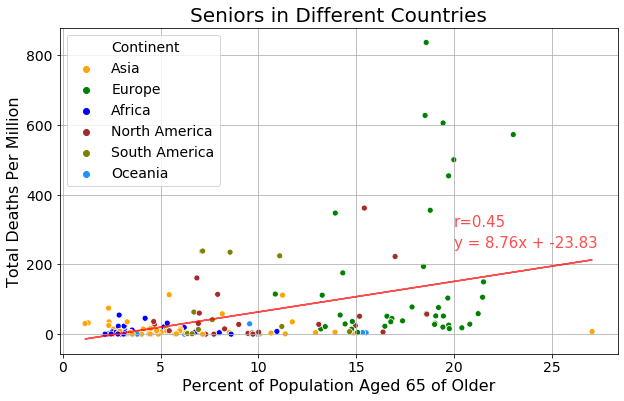

In [88]:
plt.figure(figsize=(10,6))

age_death=countries_data_number_index[["% of Aged 65 or older","Total Deaths Per Million",'Continent']]
age_death_updated=age_death.dropna()
x_values=age_death_updated["% of Aged 65 or older"]
y_values=age_death_updated["Total Deaths Per Million"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
correlation_eq="r="+str(round(correlation[0],2))

color_dict = dict({'Asia':'Orange',
                  'Europe':'green',
                  'Africa': 'blue',
                  'North America': 'brown',
                   'South America': 'olive',
                  'Oceania':'dodgerblue'})
sns.scatterplot(x="% of Aged 65 or older",y="Total Deaths Per Million", 
              hue="Continent",palette=color_dict, 
              data=age_death_updated)
plt.plot(x_values,regress_values,"r-",alpha=0.7)

plt.title("Seniors in Different Countries",fontsize=20)

plt.annotate(line_eq,(20,250),fontsize=15,color="red",alpha=0.7)
plt.annotate(correlation_eq,(20,310),fontsize=15,color="red",alpha=0.7)

plt.legend(loc="upper left", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Percent of Population Aged 65 of Older",fontsize=16)
plt.ylabel("Total Deaths Per Million", fontsize=16)
plt.grid()
plt.savefig('Seniors in Different Countries.png', dpi=400)
plt.show()

In [17]:
africa_65_cases_df=countries_data_number_index[countries_data_number_index['Continent']=="Africa"]
asia_65_cases_df=countries_data_number_index[countries_data_number_index['Continent']=="Asia"]
europe_65_cases_df=countries_data_number_index[countries_data_number_index['Continent']=="Europe"]
north_america_65_cases_df=countries_data_number_index[countries_data_number_index['Continent']=="North America"]
oceania_65_cases_df=countries_data_number_index[countries_data_number_index['Continent']=="Oceania"]
south_america_65_cases_df=countries_data_number_index[countries_data_number_index['Continent']=="South America"]

oceania_65_cases_df.head()

,Country,Continent,Date,Total Cases,New Cases,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,% of Aged 65 or older,GDP Per Capita,Covid Death Rate,Diabetes Prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
10,Australia,Oceania,2020-06-21,7436.0,27.0,4.000,NaN,NaN,3.202,15.504,44648.710,107.791,5.07,38.0,21.40,Open with limitations,-24.5780,133.5820,High income
66,Fiji,Oceania,2020-06-21,18.0,0.0,0.000,NaN,NaN,49.562,6.224,8702.975,412.820,14.49,23.0,NaN,Closed,-17.7941,177.9783,Upper middle income
69,French Polynesia,Oceania,2020-06-21,60.0,0.0,0.000,NaN,NaN,77.324,7.775,NaN,NaN,22.63,NaN,NaN,NaN,NaN,NaN,NaN
79,Guam,Oceania,2020-06-21,222.0,22.0,29.624,NaN,NaN,304.128,9.551,NaN,310.496,21.52,NaN,NaN,NaN,NaN,NaN,NaN
136,New Caledonia,Oceania,2020-06-21,21.0,0.0,0.000,NaN,NaN,15.342,9.954,NaN,NaN,23.36,NaN,NaN,NaN,NaN,NaN,NaN


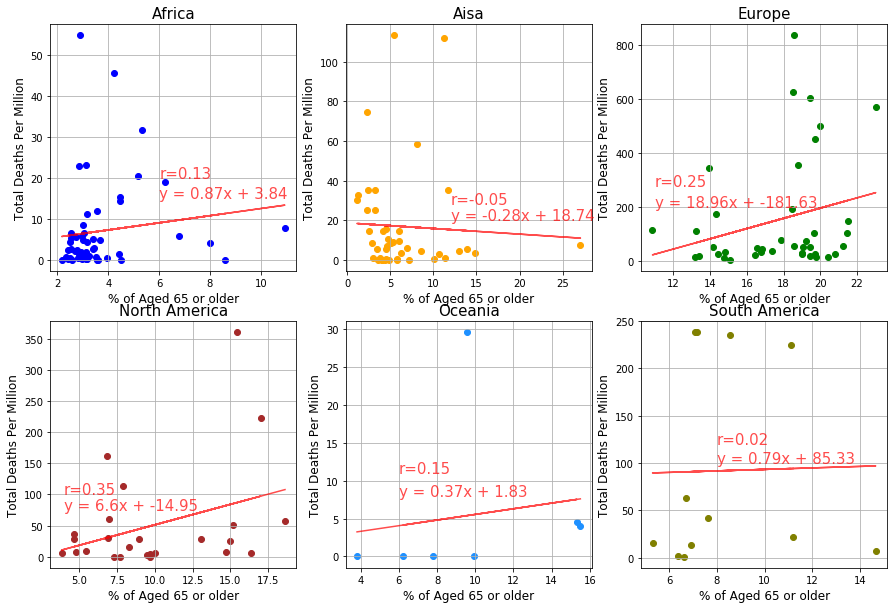

In [89]:
fig, axs = plt.subplots(2,3,figsize=(15,10))

# africa
africa_65_cases_df_updated=africa_65_cases_df[["% of Aged 65 or older","Total Deaths Per Million"]]
africa_65_cases_df_updated=africa_65_cases_df_updated.dropna()
x_values=africa_65_cases_df_updated["% of Aged 65 or older"]
y_values=africa_65_cases_df_updated["Total Deaths Per Million"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[0,0].scatter(x_values, y_values,color='blue')
axs[0,0].plot(x_values,regress_values,"r-",alpha=0.7)
axs[0,0].set_title('Africa', size=15) # Title
axs[0,0].set_xlabel('% of Aged 65 or older', fontsize = 12) # Y label
axs[0,0].set_ylabel('Total Deaths Per Million', fontsize = 12) # Y label
axs[0,0].annotate(line_eq,(6,15),fontsize=15,color="red",alpha=0.7)
correlation = st.pearsonr(x_values,y_values)
correlation_eq="r="+str(round(correlation[0],2))
axs[0,0].annotate(correlation_eq,(6,20),fontsize=15,color="red",alpha=0.7)
axs[0,0].grid()

# asia
aisa_65_cases_df_updated=asia_65_cases_df[["% of Aged 65 or older","Total Deaths Per Million"]]
aisa_65_cases_df_updated=aisa_65_cases_df_updated.dropna()
x_values=aisa_65_cases_df_updated["% of Aged 65 or older"]
y_values=aisa_65_cases_df_updated["Total Deaths Per Million"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[0,1].scatter(x_values, y_values,color='orange')
axs[0,1].plot(x_values,regress_values,"r-",alpha=0.7)
axs[0,1].set_title('Aisa', size=15) # Title
axs[0,1].set_xlabel('% of Aged 65 or older', fontsize = 12) # Y label
axs[0,1].set_ylabel('Total Deaths Per Million', fontsize = 12) # Y label
axs[0,1].annotate(line_eq,(12,20),fontsize=15,color="red",alpha=0.7)
correlation = st.pearsonr(x_values,y_values)
correlation_eq="r="+str(round(correlation[0],2))
axs[0,1].annotate(correlation_eq,(12,28),fontsize=15,color="red",alpha=0.7)
axs[0,1].grid()

# europe
europe_65_cases_df_updated=europe_65_cases_df[["% of Aged 65 or older","Total Deaths Per Million"]]
europe_65_cases_df_updated=europe_65_cases_df_updated.dropna()
x_values=europe_65_cases_df_updated["% of Aged 65 or older"]
y_values=europe_65_cases_df_updated["Total Deaths Per Million"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[0,2].scatter(x_values, y_values,color='green')
axs[0,2].plot(x_values,regress_values,"r-",alpha=0.7)
axs[0,2].set_title('Europe', size=15) # Title
axs[0,2].set_xlabel('% of Aged 65 or older', fontsize = 12) # Y label
axs[0,2].set_ylabel('Total Deaths Per Million', fontsize = 12) # Y label
axs[0,2].annotate(line_eq,(11,200),fontsize=15,color="red",alpha=0.7)
correlation = st.pearsonr(x_values,y_values)
correlation_eq="r="+str(round(correlation[0],2))
axs[0,2].annotate(correlation_eq,(11,280),fontsize=15,color="red",alpha=0.7)
axs[0,2].grid()

# North America
north_america_65_cases_df_updated=north_america_65_cases_df[["% of Aged 65 or older","Total Deaths Per Million"]]
north_america_65_cases_df_updated=north_america_65_cases_df_updated.dropna()
x_values=north_america_65_cases_df_updated["% of Aged 65 or older"]
y_values=north_america_65_cases_df_updated["Total Deaths Per Million"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[1,0].scatter(x_values, y_values,color='brown')
axs[1,0].plot(x_values,regress_values,"r-",alpha=0.7)
axs[1,0].set_title('North America', size=15) # Title
axs[1,0].set_xlabel('% of Aged 65 or older', fontsize = 12) # Y label
axs[1,0].set_ylabel('Total Deaths Per Million', fontsize = 12) # Y label
axs[1,0].annotate(line_eq,(4,75),fontsize=15,color="red",alpha=0.7)
correlation = st.pearsonr(x_values,y_values)
correlation_eq="r="+str(round(correlation[0],2))
axs[1,0].annotate(correlation_eq,(4,100),fontsize=15,color="red",alpha=0.7)
axs[1,0].grid()


#oceania
oceania_65_cases_df_updated=oceania_65_cases_df[["% of Aged 65 or older","Total Deaths Per Million"]]
oceania_65_cases_df_updated=oceania_65_cases_df_updated.dropna()
x_values=oceania_65_cases_df_updated["% of Aged 65 or older"]
y_values=oceania_65_cases_df_updated["Total Deaths Per Million"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[1,1].scatter(x_values, y_values,color='dodgerblue')
axs[1,1].plot(x_values,regress_values,"r-",alpha=0.7)
axs[1,1].set_title('Oceania', size=15) # Title
axs[1,1].set_xlabel('% of Aged 65 or older', fontsize = 12) # Y label
axs[1,1].set_ylabel('Total Deaths Per Million', fontsize = 12) # Y label
axs[1,1].annotate(line_eq,(6,8),fontsize=15,color="red",alpha=0.7)
correlation = st.pearsonr(x_values,y_values)
correlation_eq="r="+str(round(correlation[0],2))
axs[1,1].annotate(correlation_eq,(6,11),fontsize=15,color="red",alpha=0.7)
axs[1,1].grid()

#south america
south_america_65_cases_df_updated=south_america_65_cases_df[["% of Aged 65 or older","Total Deaths Per Million"]]
south_america_65_cases_df_updated=south_america_65_cases_df_updated.dropna()
x_values=south_america_65_cases_df_updated["% of Aged 65 or older"]
y_values=south_america_65_cases_df_updated["Total Deaths Per Million"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[1,2].scatter(x_values, y_values,color='olive')
axs[1,2].plot(x_values,regress_values,"r-",alpha=0.7)
axs[1,2].set_title('South America', size=15) # Title
axs[1,2].set_xlabel('% of Aged 65 or older', fontsize = 12) # Y label
axs[1,2].set_ylabel('Total Deaths Per Million', fontsize = 12) # Y label
axs[1,2].annotate(line_eq,(8,100),fontsize=15,color="red",alpha=0.7)
correlation = st.pearsonr(x_values,y_values)
correlation_eq="r="+str(round(correlation[0],2))
axs[1,2].annotate(correlation_eq,(8,120),fontsize=15,color="red",alpha=0.7)
axs[1,2].grid()

# plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('Death rate of the elder in different continents.png', dpi=400)
plt.show()